<a href="https://colab.research.google.com/github/andriellymoraespereira/analise-de-visitas-em-ecommerce/blob/main/03_tendencias_temporal_nas_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Tendências Temporais nas Vendas

Podemos verificar a tendência de vendas ao longo do tempo, identificando aumentos, diminuições e possíveis sazonalidades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Acessar o arquivo do Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Carregar o dataset a partir do Google Drive

df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')

# Exibir as primeiras linhas do DataFrame para verificar se o arquivo foi carregado corretamente
print(df.head())

Mounted at /content/drive
                  event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00+00:00       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00+00:00       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01+00:00       view    17302664  2053013553853497655   
3  2019-11-01 00:00:01+00:00       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01+00:00       view     1004775  2053013555631882655   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2                    Unknown   creed   28.31  561587266   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  755422e7-9040-477b-9bd2-6a6e8fd97

In [3]:
# Converter a coluna 'event_time' para datetime
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce', utc=True)

In [4]:
# Filtrar apenas os eventos de compra
evento_comprar = df[df['event_type'] == 'purchase']

In [5]:
# Verificar o intervalo de datas
print("Intervalo de datas na coluna 'event_time':")
print(evento_comprar['event_time'].min(), evento_comprar['event_time'].max())


Intervalo de datas na coluna 'event_time':
2019-11-01 00:00:41+00:00 2019-11-04 07:09:02+00:00


In [6]:
# Criar uma nova coluna apenas com a data (sem o tempo)
evento_comprar['date'] = evento_comprar['event_time'].dt.date

<ipython-input-6-49ff870deb31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evento_comprar['date'] = evento_comprar['event_time'].dt.date


In [7]:
# Contar o número de compras por dia
comprar_per_day = evento_comprar['date'].value_counts().sort_index()

In [8]:
# Verificar as primeiras linhas do resultado
print("Número de eventos por dia (primeiras linhas):")
print(comprar_per_day.head(10))

# Verificar as últimas linhas do resultado
print("Número de eventos por dia (últimas linhas):")
print(comprar_per_day.tail(10))

Número de eventos por dia (primeiras linhas):
date
2019-11-01    22457
2019-11-02    21863
2019-11-03    22145
2019-11-04     7311
Name: count, dtype: int64
Número de eventos por dia (últimas linhas):
date
2019-11-01    22457
2019-11-02    21863
2019-11-03    22145
2019-11-04     7311
Name: count, dtype: int64


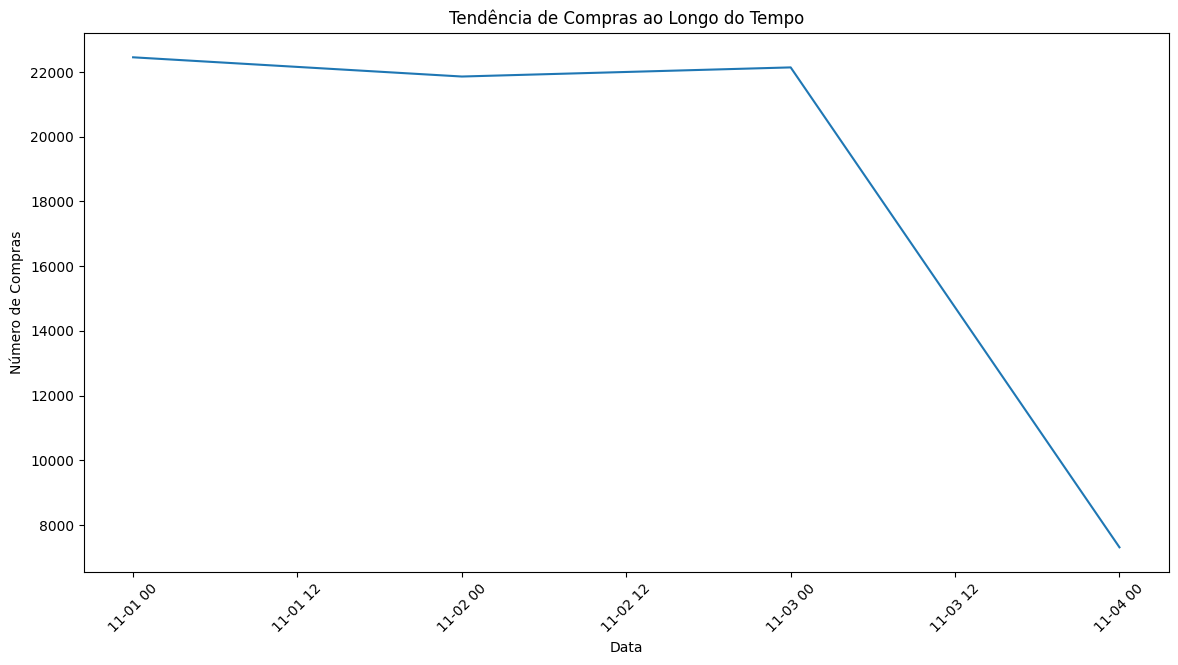

In [9]:
# Plotar o número de compras ao longo do tempo
plt.figure(figsize=(14, 7))
comprar_per_day.plot()
plt.title('Tendência de Compras ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

**Análise Sazonal**

Podemos verificar se há padrões sazonais nas vendas, como picos em determinados dias da semana.

<ipython-input-13-a208db3cfdad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evento_comprar['date'] = pd.to_datetime(evento_comprar['date'])


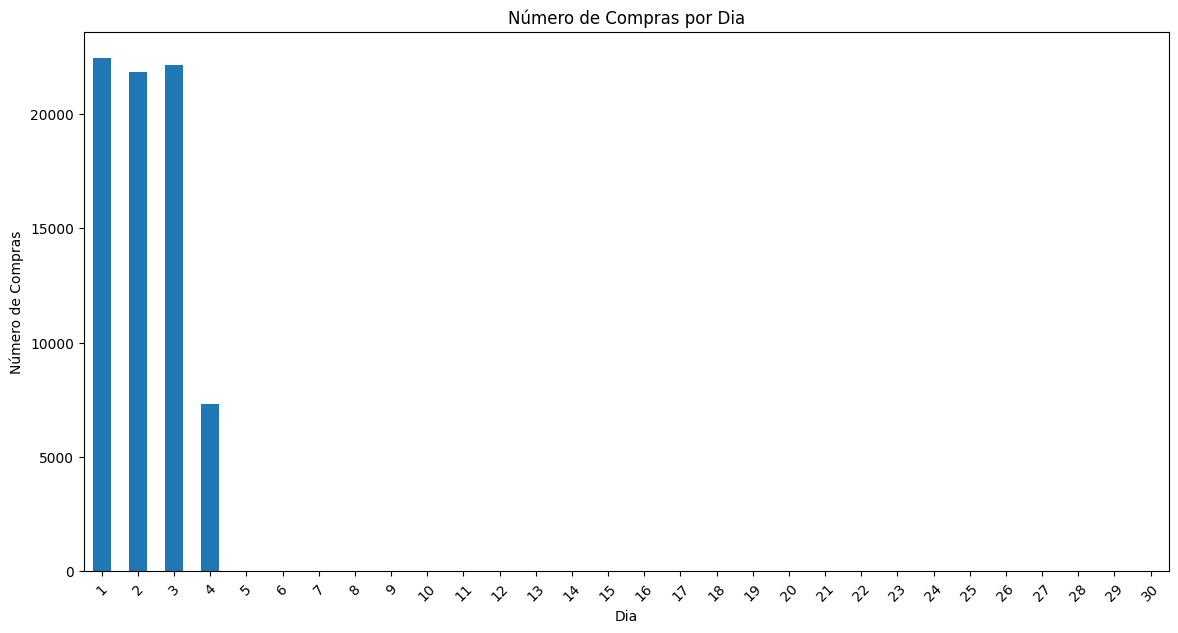

In [13]:
# Verificando e convertendo a coluna de datas para datetime
evento_comprar['date'] = pd.to_datetime(evento_comprar['date'])

# Agrupar por dia do mês e contar as compras
comprar_per_day = evento_comprar['date'].dt.day.value_counts().sort_index()


# Garantir que todos os 30 dias estejam representados
comprar_per_day = comprar_per_day.reindex(range(1, 31), fill_value=0)


# Plotar o número de compras por mês
plt.figure(figsize=(14, 7))
comprar_per_day.plot(kind='bar')
plt.title('Número de Compras por Dia')
plt.xlabel('Dia')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

**Análise** **de Compras por Dia da Semana**

Podemos verificar se há padrões nas vendas de acordo com o dia da semana.

<ipython-input-14-182514092383>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evento_comprar['day_of_week'] = evento_comprar['event_time'].dt.day_name()


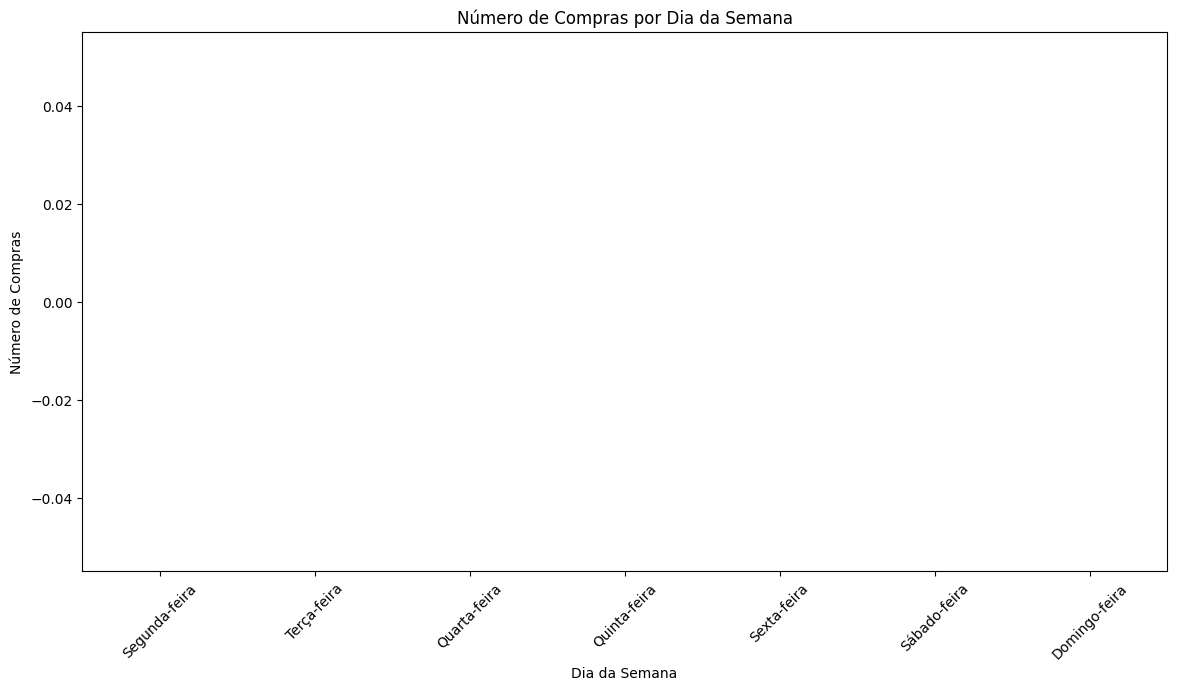

In [14]:
# Criar uma nova coluna para o dia da semana
evento_comprar['day_of_week'] = evento_comprar['event_time'].dt.day_name()

# Contar o número de compras por dia da semana
comprar_per_day_of_week = evento_comprar['day_of_week'].value_counts().reindex(
    ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado-feira', 'Domingo-feira']
)

# Plotar o número de compras por dia da semana
plt.figure(figsize=(14, 7))
comprar_per_day_of_week.plot(kind='bar')
plt.title('Número de Compras por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()


**Análise de Compras por Horário do Dia**

In [15]:
# Criar uma nova coluna para a hora do dia
evento_comprar['hour'] = evento_comprar['event_time'].dt.hour

<ipython-input-15-010fc0d4723b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evento_comprar['hour'] = evento_comprar['event_time'].dt.hour


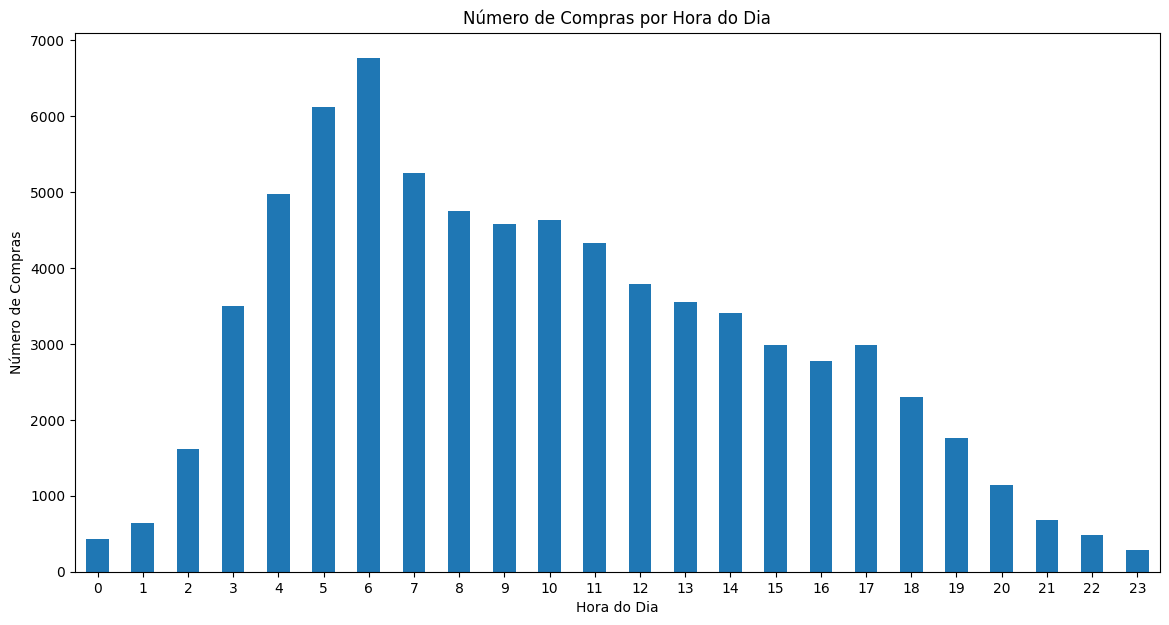

In [16]:
# Contar o número de compras por hora
comprar_per_hour = evento_comprar['hour'].value_counts().sort_index()

# Plotar o número de compras por hora do dia
plt.figure(figsize=(14, 7))
comprar_per_hour.plot(kind='bar')
plt.title('Número de Compras por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Compras')
plt.xticks(rotation=0)
plt.show()

**Análise de Vendas por Categoria de Produto**

Podemos verificar as tendências de vendas por categoria de produto ao longo do tempo.

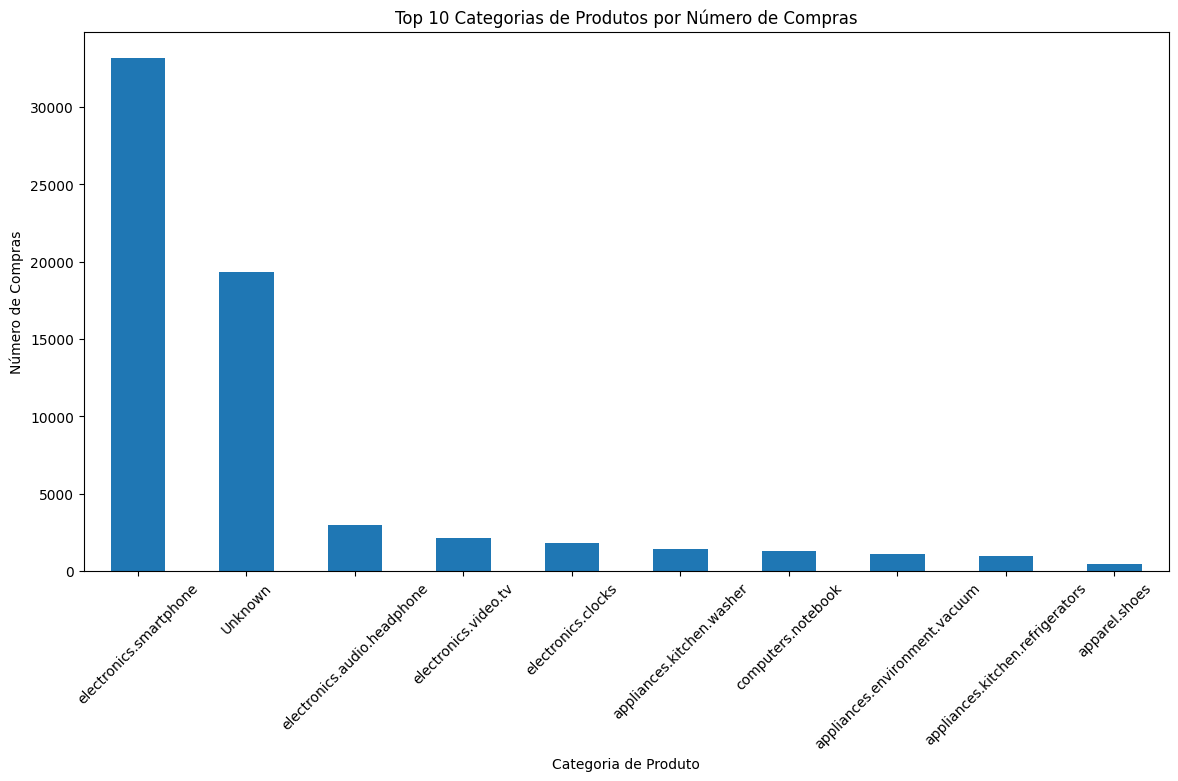

In [17]:
# Contar o número de compras por categoria de produto
comprar_per_category = evento_comprar['category_code'].value_counts().head(10)

# Plotar o número de compras por categoria de produto
plt.figure(figsize=(14, 7))
comprar_per_category.plot(kind='bar')
plt.title('Top 10 Categorias de Produtos por Número de Compras')
plt.xlabel('Categoria de Produto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()


**Análise de Preços e Receita**

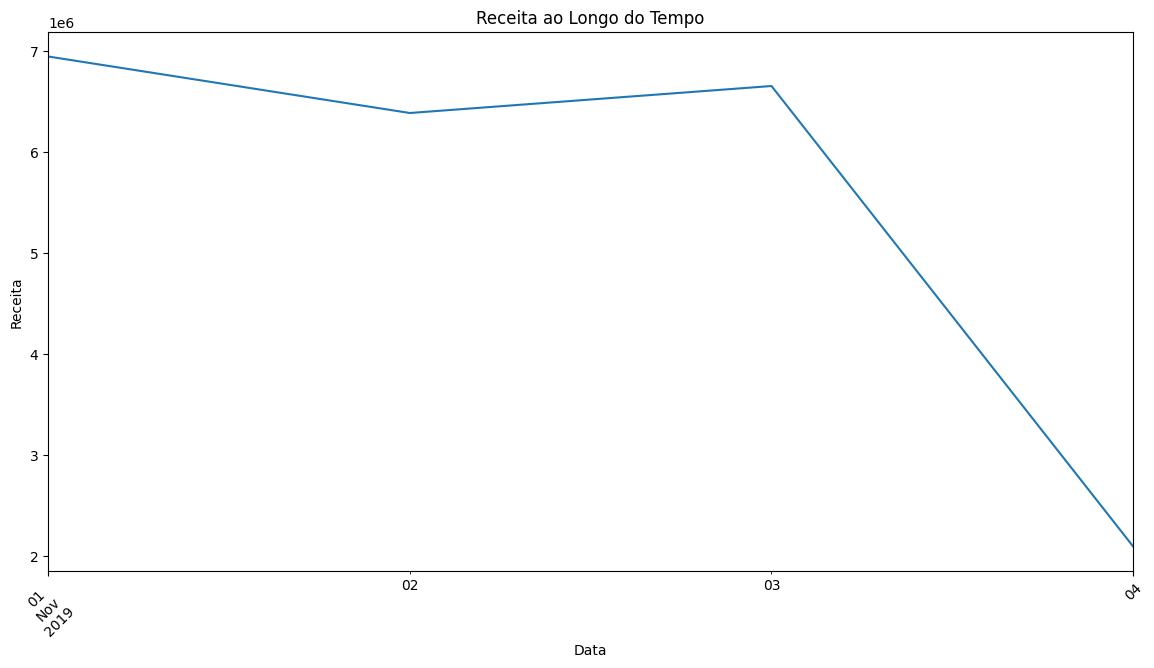

In [18]:
# Calcular a receita por dia
receita_per_day = evento_comprar.groupby('date')['price'].sum()

# Plotar a receita ao longo do tempo
plt.figure(figsize=(14, 7))
receita_per_day.plot()
plt.title('Receita ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()